In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load
mouse_data_csv = "./data/mouse_drug_data.csv"
clinical_data_csv = "./data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_data_csv)
clin_data = pd.read_csv(clinical_data_csv)

# Combine the data into a single dataset
data = pd.merge(mouse_data, clin_data)

# Display the data table for preview
data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_mean = data.groupby(['Drug', 'Timepoint']).mean()

# Convert to DataFrame
tumor_mean_df = pd.DataFrame( tumor_mean )[['Tumor Volume (mm3)']]

# Preview DataFrame
tumor_mean_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_sem = data.groupby(['Drug', 'Timepoint']).sem()

# Convert to DataFrame
tumor_sem_df = pd.DataFrame( tumor_sem )[['Tumor Volume (mm3)']]

# Preview DataFrame
tumor_sem_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [61]:
# Minor Data Munging to Re-Format the Data Frames
df = data.pivot_table( index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


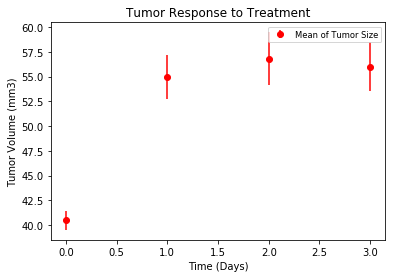

In [60]:
# Collect data to use in Plot
df = df[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
means = df.mean()
errors = df.sem()

# Create plot
fig,ax = plt.subplots()

# Configure Plot details
ax.errorbar( np.arange(0, len(means)), 
            means, 
            yerr=errors,
            fmt='o',
            color='r',
            label='Mean of Tumor Size')
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Tumor Response to Treatment")
plt.legend( loc="best", fontsize="small", fancybox=True )
plt.show()

# Save the Figure
#plt.savefig( fname = "drug_plt.png", bbox = 'tight')


In [ ]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [ ]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()